In [1]:
from numpy import linalg as LA
import numpy as np
import pandas as pd
import math


def eigenvalue_clipping(lambdas,v,lambda_plus):
    N=len(lambdas)
    
    
    # _s stands for _structure below
    sum_lambdas_gt_lambda_plus=np.sum(lambdas[lambdas>lambda_plus])
    
    sel_bulk=lambdas<=lambda_plus                     # these eigenvalues come from the seemingly random bulk
    N_bulk=np.sum(sel_bulk)
    sum_lambda_bulk=np.sum(lambdas[sel_bulk])        
    delta=sum_lambda_bulk/N_bulk                      # delta is their average, so as to conserver the trace of C
    
    lambdas_clean=lambdas
    lambdas_clean[lambdas_clean<=lambda_plus]=delta
    
    
    C_clean=np.zeros((N, N))
    v_m=np.matrix(v)
    
    for i in range(N-1):
        C_clean=C_clean+lambdas_clean[i] * np.dot(v_m[i,].T,v_m[i,]) 
        
    np.fill_diagonal(C_clean,1)
            
    return C_clean    
    


In [2]:

N=1000
T=2000
R=np.random.normal(0,1,N*T).reshape((N,T))
R.shape

(1000, 2000)

In [3]:
C=np.corrcoef(R)
C.shape               # N times N, so far so good.

(1000, 1000)

In [4]:
lambdas_e, V_e = LA.eig(C)   # _e stands for empirical


# Marcenko-Pastur distribution


In [5]:
def P0(lambdas,q):
    lambda_plus = (1+np.sqrt(q))**2
    lambda_minus = (1-np.sqrt(q))**2
    vals = 1/(q*2*np.pi*lambdas)*np.sqrt((lambda_plus-lambdas)*(lambdas-lambda_minus))
    return vals

In [6]:
q=N/T
lambdas=np.linspace((1.-np.sqrt(q))**2,(1.+np.sqrt(q))**2,200)
P0s=P0(lambdas,q)

/tmp/ipykernel_981721/762245224.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lambdas_e,kde=False,norm_hist=True,bins=50)  # no Kernel Density Estimation


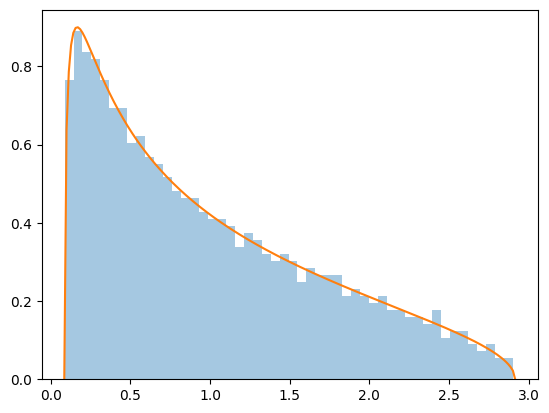

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(lambdas_e,kde=False,norm_hist=True,bins=50)  # no Kernel Density Estimation
plt.plot(lambdas,P0s)

In [11]:
q=N/T
lambda_plus=(1+np.sqrt(q))**2
C_clipped=eigenvalue_clipping(lambdas_e,V_e,lambda_plus)
C_clipped # it works


matrix([[ 1.00000000e+00, -3.52682725e-04, -3.84334322e-04, ...,
          1.89683102e-04, -8.29234480e-04,  3.23662531e-04],
        [-3.52682725e-04,  1.00000000e+00, -2.67605120e-04, ...,
          1.32072954e-04, -5.77381149e-04,  2.25360436e-04],
        [-3.84334322e-04, -2.67605120e-04,  1.00000000e+00, ...,
          1.43925874e-04, -6.29198361e-04,  2.45585464e-04],
        ...,
        [ 1.89683102e-04,  1.32072954e-04,  1.43925874e-04, ...,
          1.00000000e+00,  3.10532498e-04, -1.21205445e-04],
        [-8.29234480e-04, -5.77381149e-04, -6.29198361e-04, ...,
          3.10532498e-04,  1.00000000e+00,  5.29871840e-04],
        [ 3.23662531e-04,  2.25360436e-04,  2.45585464e-04, ...,
         -1.21205445e-04,  5.29871840e-04,  1.00000000e+00]])

## Equity data


In [12]:
alldata=pd.read_csv("data/clean/us_equities_logreturns.csv.gz")

In [13]:
alldata.drop(columns="Unnamed: 0",inplace=True)

In [14]:
T=2000   # N\simeq 1000

C_us = alldata.iloc[14000:14000+T].dropna(axis=1).corr()   # drops any asset with an NA

In [15]:
C_us

,^GSPC,GE,IBM,DIS,BA,CAT,AA,HPQ,DD,KO,...,CIG,NCR,CVD,MWW,LVB,CNH,MIL,ABV,STL,CAE
^GSPC,1.000000,0.757651,0.728267,0.802214,0.713069,0.762620,0.750332,0.612043,0.828707,0.641990,...,0.594005,0.628846,0.466137,0.602749,0.565244,0.670298,0.506305,0.701553,0.673886,0.519977
GE,0.757651,1.000000,0.549707,0.602880,0.545805,0.583247,0.575968,0.435446,0.634974,0.434391,...,0.404596,0.513133,0.325952,0.467609,0.456291,0.520290,0.412907,0.497746,0.502278,0.380581
IBM,0.728267,0.549707,1.000000,0.597935,0.517019,0.542907,0.533195,0.548963,0.612007,0.471378,...,0.444717,0.485306,0.327399,0.450605,0.420759,0.475533,0.367023,0.529783,0.495932,0.384097
DIS,0.802214,0.602880,0.597935,1.000000,0.607306,0.617839,0.610154,0.518820,0.677754,0.545457,...,0.461646,0.520343,0.374199,0.513484,0.465225,0.547896,0.390094,0.553178,0.527531,0.419937
BA,0.713069,0.545805,0.517019,0.607306,1.000000,0.589099,0.579382,0.457717,0.600623,0.471285,...,0.428301,0.477360,0.341166,0.481414,0.427058,0.505409,0.353870,0.491567,0.447726,0.421091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CNH,0.670298,0.520290,0.475533,0.547896,0.505409,0.669065,0.607737,0.424418,0.609401,0.366323,...,0.415027,0.491392,0.342290,0.460797,0.431087,1.000000,0.436451,0.496715,0.409576,0.436485
MIL,0.506305,0.412907,0.367023,0.390094,0.353870,0.412400,0.458233,0.297306,0.438377,0.256242,...,0.323709,0.369693,0.280758,0.326741,0.284451,0.436451,1.000000,0.357709,0.307726,0.288381
ABV,0.701553,0.497746,0.529783,0.553178,0.491567,0.521592,0.560849,0.429862,0.580185,0.463710,...,0.623843,0.404245,0.306997,0.409715,0.395785,0.496715,0.357709,1.000000,0.418452,0.396318
STL,0.673886,0.502278,0.495932,0.527531,0.447726,0.505333,0.464573,0.405177,0.565677,0.434978,...,0.389869,0.431931,0.356505,0.428741,0.495720,0.409576,0.307726,0.418452,1.000000,0.319431


In [16]:
l_e, V_e = LA.eig(C_us)

In [17]:
N = C_us.shape[0]
q = N/T
lambda_plus = (1+np.sqrt(q))**2

In [18]:
### Number of eigenvalues outside of the random bulk

In [19]:
np.sum(l_e>lambda_plus)   # about 2% of the eigenvalues

18

In [20]:
np.sum(l_e>lambda_plus)/N   # about 2% of the eigenvalues

0.019715224534501644

In [21]:
C_us_clipped=eigenvalue_clipping(l_e,V_e,lambda_plus)

In [25]:
C_us_clipped

matrix([[ 1.        ,  0.02767634,  0.06933673, ..., -0.0837502 ,
          0.06716053, -0.07835433],
        [ 0.02767634,  1.        ,  0.02505282, ...,  0.00296111,
          0.02346199,  0.0697074 ],
        [ 0.06933673,  0.02505282,  1.        , ..., -0.01736605,
          0.03326861,  0.05434441],
        ...,
        [-0.0837502 ,  0.00296111, -0.01736605, ...,  1.        ,
         -0.06667552,  0.0178296 ],
        [ 0.06716053,  0.02346199,  0.03326861, ..., -0.06667552,
          1.        ,  0.01295075],
        [-0.07835433,  0.0697074 ,  0.05434441, ...,  0.0178296 ,
          0.01295075,  1.        ]])